In [27]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

In [28]:
CREMA = '../raw_data/wav_files/'
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [36]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

<AxesSubplot:>

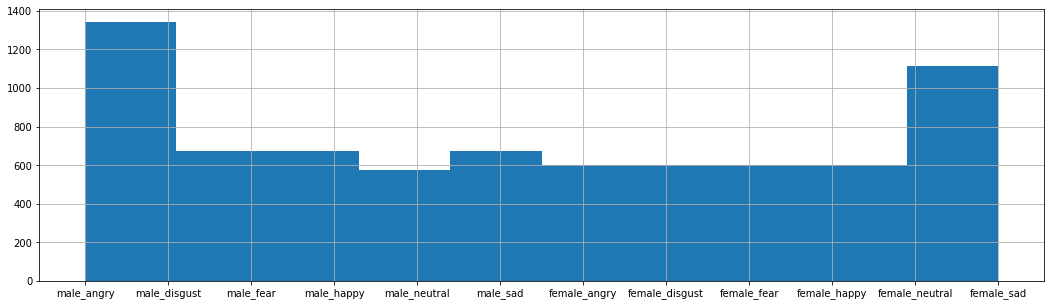

In [30]:
plt.figure(figsize=(18,5))
CREMA_df.labels.hist()


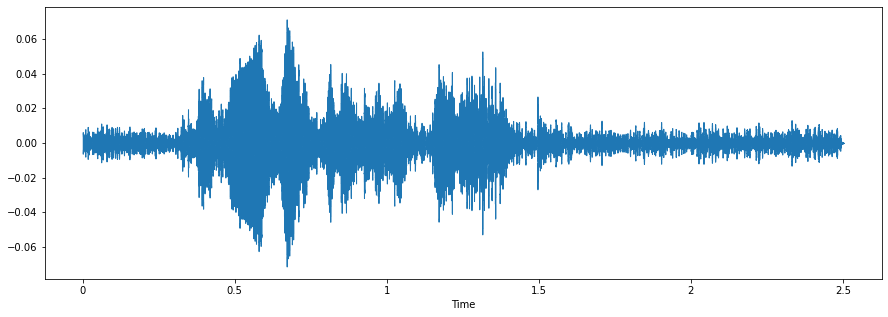

In [34]:
# use the well known Librosa library for this task 
fname = CREMA + '1091_IWW_SAD_XX.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
Audio(fname)

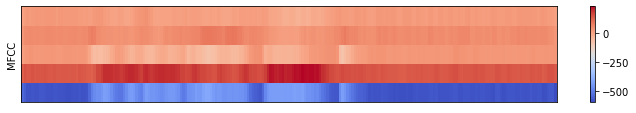

In [38]:
SAMPLE_RATE = 44100  
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 5) # 5 MFCC components

plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

/tmp/ipykernel_781/2998307289.py:2: FutureWarning: Pass y=[ 5.5271708e-03  6.3916706e-03  6.2614065e-03 ...  2.8221950e-07
 -6.6512985e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)


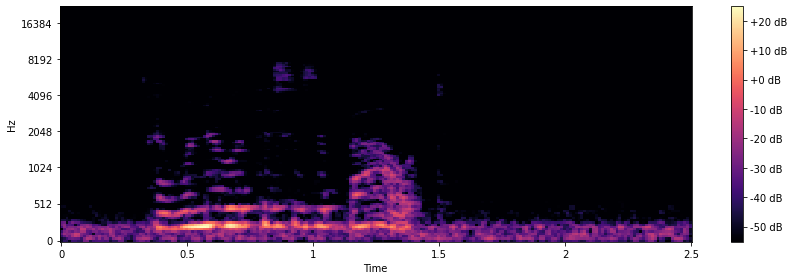

In [41]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout();

In [45]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) 
y_harmonic, y_percussive = librosa.effects.hpss(y)
Audio(y_harmonic, rate=sr)

In [44]:
Audio(y_percussive, rate=sr)

/tmp/ipykernel_781/848197121.py:2: FutureWarning: Pass y=[ 3.1376195e-03  3.7753142e-03  3.9662300e-03 ... -5.1432016e-05
 -5.5611512e-05 -5.2544015e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
/tmp/ipykernel_781/848197121.py:6: FutureWarning: Pass y=[2.3895516e-03 2.6163564e-03 2.2951767e-03 ... 5.1714247e-05 4.8960221e-05
 5.2544019e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)


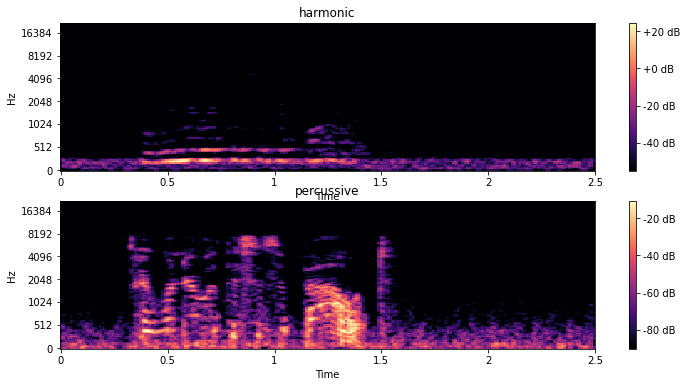

In [48]:
# harmonic 
melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
log_h = librosa.amplitude_to_db(melspec)

# percussive
melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)
log_p = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram of both harmonic and percussive
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_h, sr=sr, x_axis='time', y_axis='mel')
plt.title('harmonic')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_p, sr=sr, x_axis='time', y_axis='mel')
plt.title('percussive')
plt.colorbar(format='%+02.0f dB')

/home/geowilso/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=863
  return f(*args, **kwargs)


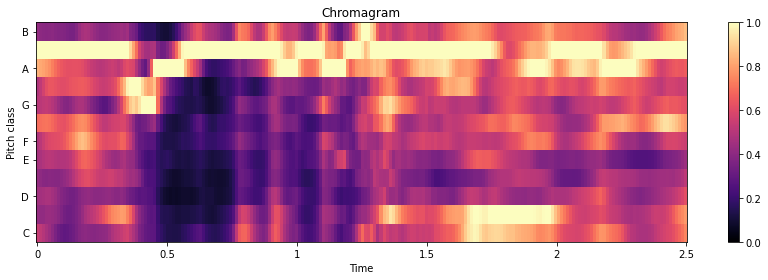

In [49]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5)
C = librosa.feature.chroma_cqt(y=y, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4))
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()